In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#!pip install scikit-learn

Emplearemos un conjunto de datos sencillo, altura y edad de los alumnos en clase. ¿Podemos derivar uno del otro?

$$

altura = \beta_1 edad + \beta_0

$$

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

# Ejercicio 1.

Obten un dataframe de los datos indicados.

In [4]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])

df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [5]:
# Aquí va vuestro código

# Ejercicio 2

Realiza una descripción de las distribuciones de las variables.

In [6]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


None

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


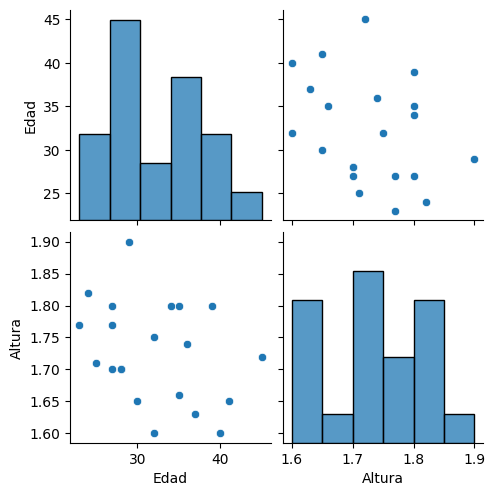

In [7]:
sns.pairplot(df);

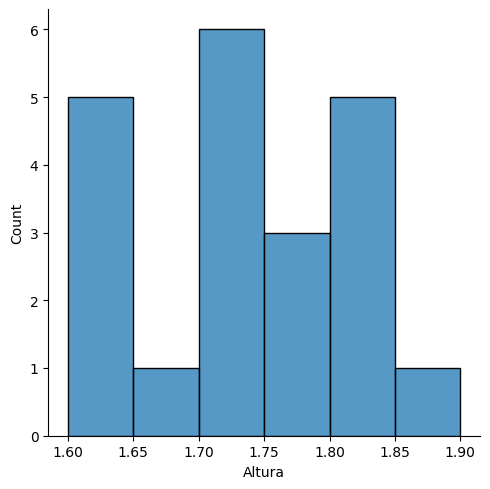

In [8]:
sns.displot(df['Altura']);

In [9]:
corr = df.corr(numeric_only=True)
corr

,Edad,Altura
Edad,1.000000,-0.329275
Altura,-0.329275,1.000000


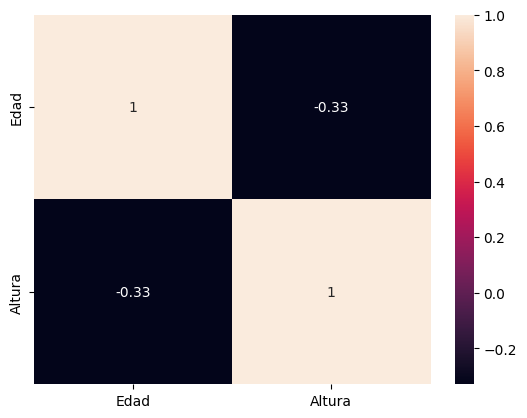

In [10]:
sns.heatmap(corr, annot=True);

# Ejercicio 3

Divide el conjunto de datos en _train_ y _test_

In [11]:
from sklearn.model_selection import train_test_split

features =  'Edad'

target = 'Altura'

In [12]:
X = df[features]
X

0     24
1     25
2     35
3     37
4     29
5     27
6     28
7     32
8     36
9     45
10    41
11    30
12    40
13    39
14    23
15    32
16    27
17    34
18    27
19    28
20    35
Name: Edad, dtype: int64

In [13]:
y = df[target]
y

0     1.82
1     1.71
2     1.66
3     1.63
4     1.90
5     1.80
6     1.70
7     1.60
8     1.74
9     1.72
10    1.65
11    1.65
12    1.60
13    1.80
14    1.77
15    1.75
16    1.70
17    1.80
18    1.77
19    1.70
20    1.80
Name: Altura, dtype: float64

In [14]:
X = df[['Edad']]  # Variable independiente (predictora)
y = df['Altura']  # Variable dependiente (respuesta)

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [16]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


# Ejercicio 4

Entrena un modelo de regresión lineal

In [17]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [18]:
print(modelo.intercept_, modelo.coef_)

1.8549066803964476 [-0.00340971]


# Ejercicio 5

Analiza los coeficientes.

In [19]:
print(modelo.intercept_)

1.8549066803964476


In [20]:
print(modelo.coef_)

[-0.00340971]


In [21]:
coeff_df = pd.DataFrame(modelo.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Edad,-0.00341


In [22]:
y_pred = modelo.predict(X_test)
y_pred

array([1.77648346, 1.76284464, 1.735567  , 1.75261552, 1.74579611,
       1.76284464, 1.72874759])

# Ejercicio 6

Evalúa visualmente el modelo.

In [23]:
y_train_pred = modelo.predict(X_train)

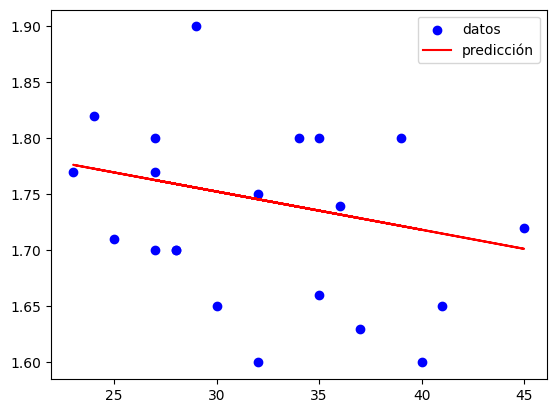

In [24]:
plt.scatter(df['Edad'], df['Altura'], color="b", label="datos")
plt.plot(df['Edad'], modelo.predict(X), color="r", label="predicción")
plt.legend()

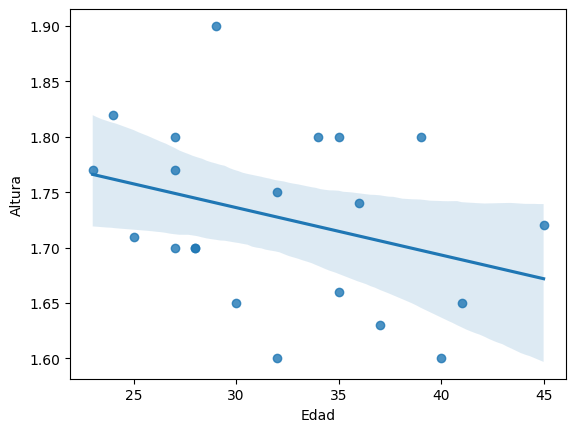

In [26]:
sns.regplot(data=df, x = 'Edad', y = 'Altura');

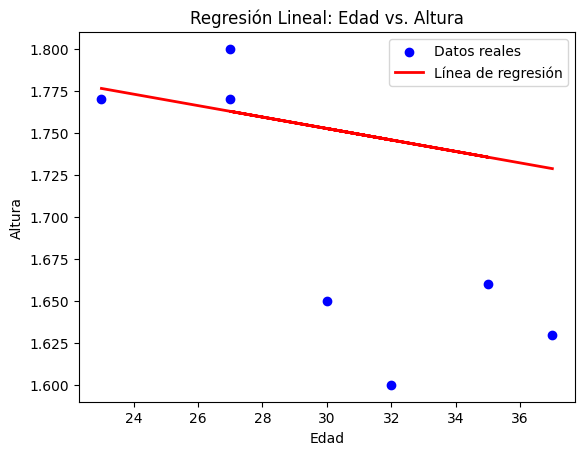

In [27]:
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Altura')
plt.title('Regresión Lineal: Edad vs. Altura')
plt.legend()
plt.show()


# Ejercicio 7

Obtén las métricas de error relevantes para este modelo.

In [28]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Error Cuadrático Medio en Entrenamiento (MSE): {mse_train:.2f}")
print(f"Coeficiente de Determinación en Entrenamiento (R^2): {r2_train:.2f}")


Error Cuadrático Medio en Entrenamiento (MSE): 0.01
Coeficiente de Determinación en Entrenamiento (R^2): 0.08


In [30]:
df_eval = pd.DataFrame(X_test)
df_eval['predictions'] = y_pred
df_eval['real_value'] = y_test
df_eval['error'] = abs(df_eval['predictions'] - df_eval['real_value'])
df_eval

,Edad,predictions,real_value,error
14,23,1.776483,1.77,0.006483
5,27,1.762845,1.80,0.037155
2,35,1.735567,1.66,0.075567
11,30,1.752616,1.65,0.102616
7,32,1.745796,1.60,0.145796
18,27,1.762845,1.77,0.007155
3,37,1.728748,1.63,0.098748


In [31]:
# MAE (Mean Absolute Error) A MANO CON NUMPY
import numpy as np
np.sum(df_eval['error'])/len(df_eval)

0.06764577165658399

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred, y_test)

0.06764577165658399

In [35]:
# MSE (Mean Squarred Error) A MANO CON NUMPY
df_eval['error_cuad'] = df_eval['error'] ** 2
np.sum(df_eval['error_cuad'])/len(df_eval)

0.006960237756489836

In [37]:
mean_squared_error(y_pred, y_test)

0.006960237756489836

In [38]:
# RMSE (Root Mean Squarred Error) A MANO CON NUMPY
np.sqrt(np.sum(df_eval['error_cuad'])/len(df_eval))

0.08342803939018247

In [39]:
np.sqrt(mean_squared_error(y_pred, y_test)) 

0.08342803939018247